# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12,8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

> Expected: False

In [6]:
col = 'height'
sample_size = 3_000
significance_level = 0.05 # 5%
sample = get_sample(athletes, col, n=sample_size)
sample.head()

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
Name: height, dtype: float64

In [7]:
_, p_value = sct.shapiro(sample)
p_value

5.681722541339695e-07

In [8]:
p_value > significance_level

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

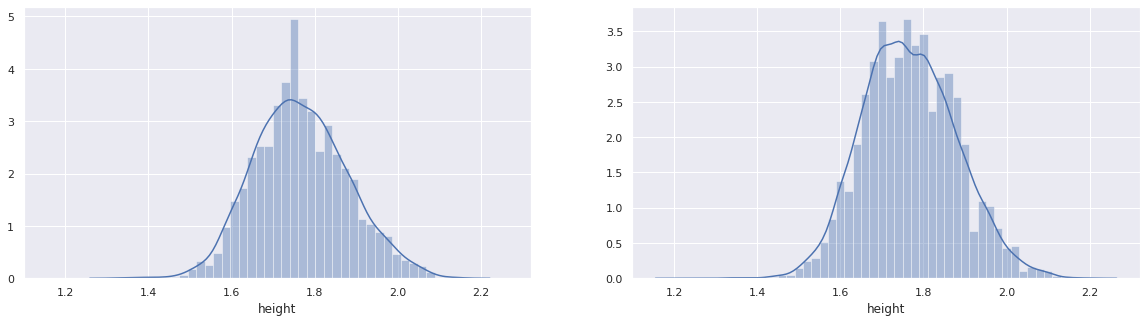

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharex=True)
sns.distplot(sample, ax=axes[0])
sns.distplot(df.height, ax=axes[1])
fig.show()

* Plote o qq-plot para essa variável e a analise.

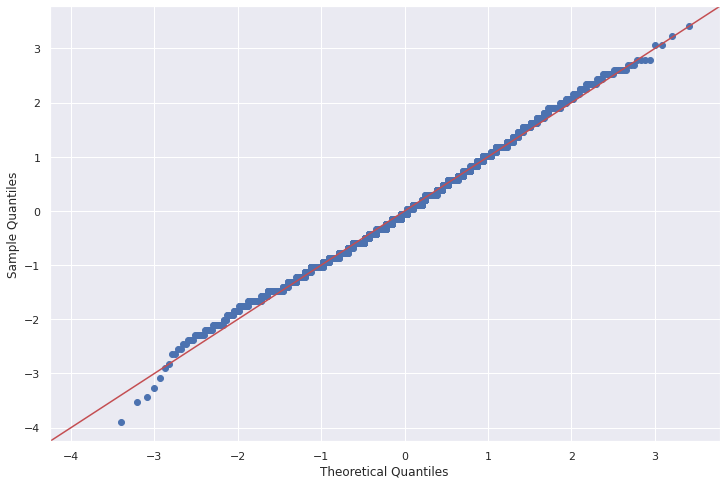

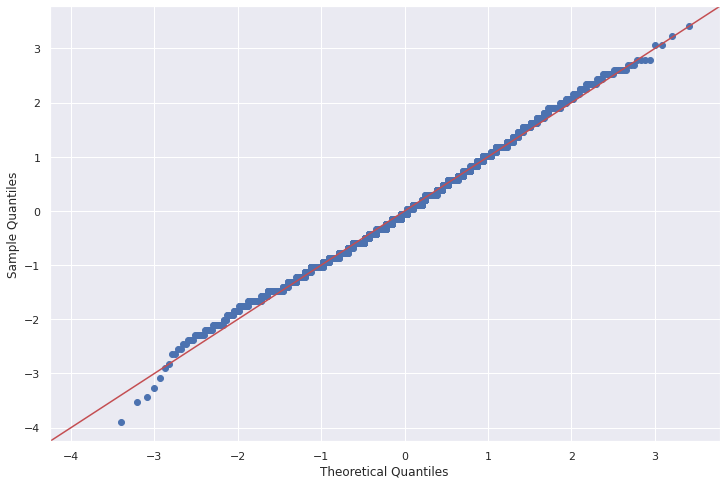

In [ ]:
sm.qqplot(sample, line='45', fit=True)

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

> Expected: False

In [9]:
significance_level = 0.05 # 5%
_, p_value = sct.jarque_bera(sample)
p_value

0.001478366424594868

In [10]:
p_value > significance_level

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

> Expected: False

In [12]:
weight_sample = get_sample(athletes, 'weight', n=3000)
significance_level = 0.05 # 5%
_, p_value = sct.normaltest(weight_sample)
p_value

1.5898922918029537e-111

In [13]:
p_value > significance_level

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

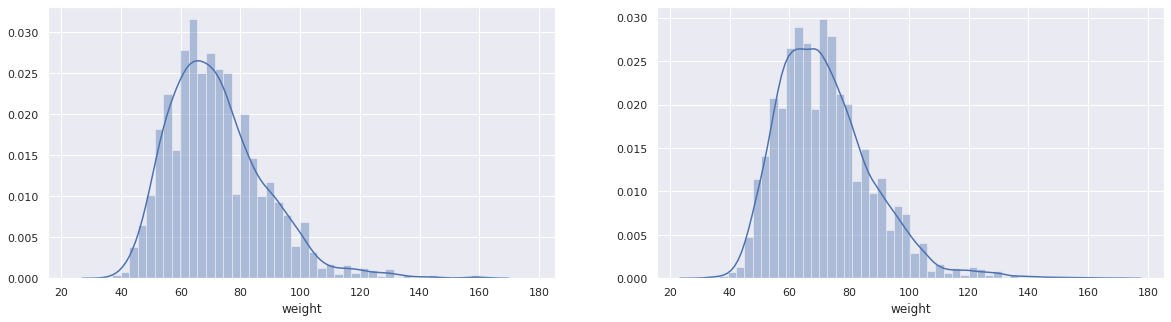

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharex=True)
sns.distplot(weight_sample, ax=axes[0])
sns.distplot(df.weight, ax=axes[1])
fig.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

> Expected: False

In [14]:
weight_sample_log = np.log(weight_sample)
weight_sample.head()

2162    80.0
3450    70.0
6886    69.0
3871    66.0
6383    82.0
Name: weight, dtype: float64

In [15]:
_, p_value = sct.normaltest(weight_sample_log)
p_value

1.0705572101256944e-10

In [16]:
significance_level = 0.05 # 5%
p_value > significance_level

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?


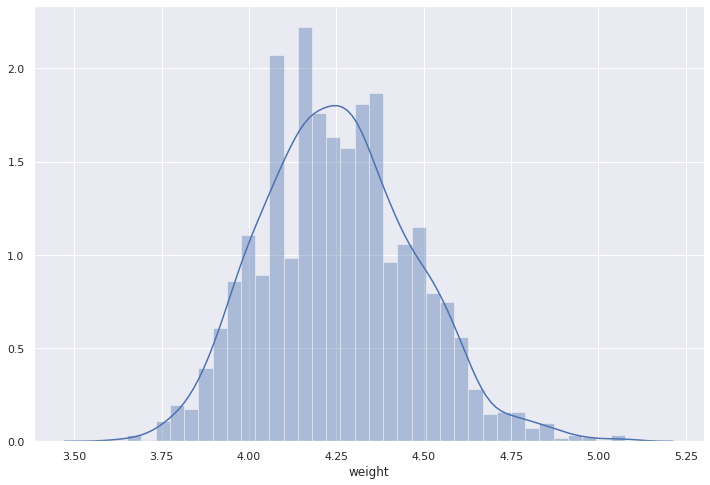

In [17]:
sns.distplot(weight_sample_log)

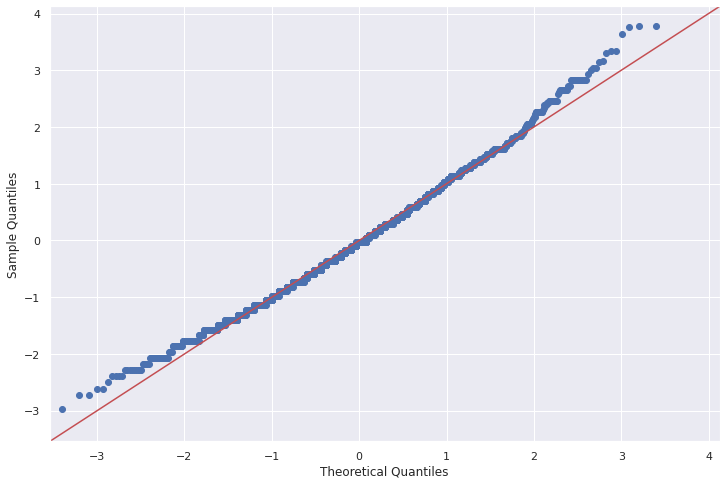

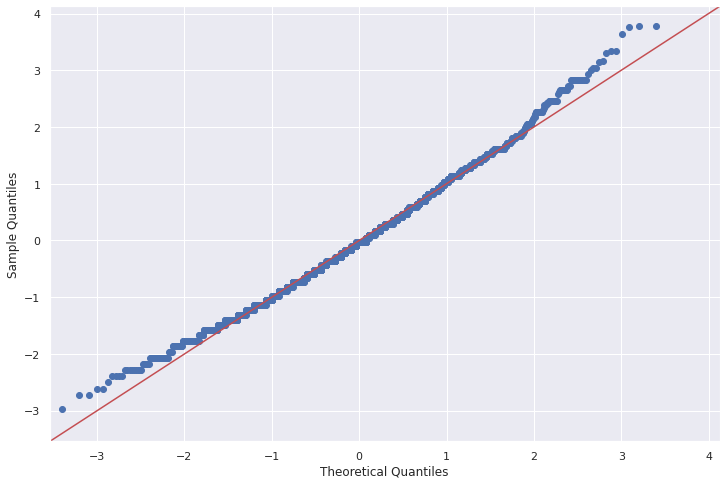

In [18]:
sm.qqplot(weight_sample_log, line='45', fit=True)

* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

> Expected: False

In [19]:
athletes_bra = athletes[athletes.nationality == 'BRA']
athletes_bra.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
79,236523132,Adam Imer,BRA,male,8/18/89,1.82,88.0,hockey,0,0,0
106,993710181,Adenizia da Silva,BRA,female,12/18/86,1.87,65.0,volleyball,0,0,0
109,930618704,Adilson da Silva,BRA,male,1/24/72,1.70,79.0,golf,0,0,0
114,787208883,Adrian Baches,BRA,male,4/7/90,1.84,83.0,aquatics,0,0,0
128,80367651,Adriana Aparecida da Silva,BRA,female,7/22/81,1.66,52.0,athletics,0,0,0


In [20]:
athletes_usa = athletes[athletes.nationality == 'USA']
athletes_usa.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0
104,259002430,Adeline Maria Gray,USA,female,1/15/91,1.73,77.0,wrestling,0,0,0


In [21]:
athletes_can = athletes[athletes.nationality == 'CAN']
athletes_can.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
77,136977152,Adam Froese,CAN,male,8/13/91,1.82,81.0,hockey,0,0,0
92,983411298,Adam van Koeverden,CAN,male,1/29/82,1.82,85.0,canoe,0,0,0
238,769580282,Akeem Haynes,CAN,male,3/11/92,1.68,71.0,athletics,0,0,1
332,84230211,Alena Sharp,CAN,female,3/7/81,1.68,69.0,golf,0,0,0


In [22]:
athletes_bra.height

79       1.82
106      1.87
109      1.70
114      1.84
128      1.66
         ... 
11052    1.78
11136    1.66
11228    1.83
11404    1.78
11457    1.70
Name: height, Length: 485, dtype: float64

In [23]:
athletes_usa.height

6        2.05
13       1.61
14       1.78
64       1.66
104      1.73
         ... 
11242    1.86
11339    1.61
11436    1.78
11437    1.94
11439    1.91
Name: height, Length: 567, dtype: float64

In [31]:
_, p_value = sct.ttest_ind(athletes_bra.height, athletes_usa.height,
                           nan_policy='omit')
p_value

0.0013229277795920673

In [32]:
significance_level = 0.05 # 5%
p_value > significance_level

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

> Expected: True

In [29]:
_, p_value = sct.ttest_ind(athletes_bra.height, athletes_can.height,
                           nan_policy='omit')
p_value

0.5226033826111448

In [30]:
significance_level = 0.05 # 5%
p_value > significance_level

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

> Expected: 0.00046601

In [35]:
_, p_value = sct.ttest_ind(athletes_usa.height, athletes_can.height,
                           equal_var=False, nan_policy='omit')
p_value

0.0004660129347389851

In [36]:
np.round(p_value, decimals=8)

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?